[Title(TBD)]

Abdulla Almahmood()  
Max Gunton()  
Yaxi Yu(V00828218)


<span style="color:orange">**1. Data Visualization.**</span>

In [ ]:
import pandas as pd

In [3]:
data = pd.read_csv('Structured Data/epi_r.csv', low_memory=False)
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


as we can see, the 1st column stores the name of each recipe; the column 2 to 6 store the generational info of each recipe; and the rest store the ingredients respectively.  
We want to visualize the 2nd to the 6th column, to see if there's any relationship we can find.  

In [4]:
data_general_info = data[['rating', 'calories', 'protein', 'fat', 'sodium']]
data_general_info.head()

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,7.0,559.0
1,4.375,403.0,18.0,23.0,1439.0
2,3.750,165.0,6.0,7.0,165.0
3,5.000,NaN,NaN,NaN,NaN
4,3.125,547.0,20.0,32.0,452.0


Then, construct a method to normalize the data

In [5]:
def normalize(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

Call this method to normalze these columns

In [6]:
data_general_info_normalized = data_general_info.apply(normalize)
data_general_info_normalized.head()

,rating,calories,protein,fat,sodium
0,0.500,0.000014,0.000127,0.000004,0.000020
1,0.875,0.000013,0.000076,0.000013,0.000052
2,0.750,0.000005,0.000025,0.000004,0.000006
3,1.000,NaN,NaN,NaN,NaN
4,0.625,0.000018,0.000085,0.000019,0.000016


We can use seaborn to make the plot

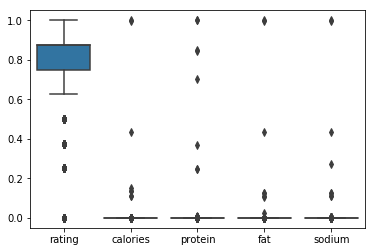

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(data = data_general_info_normalized)
plt.show()

Use Violin Plot to visualise the distribution of the data and its probability density.

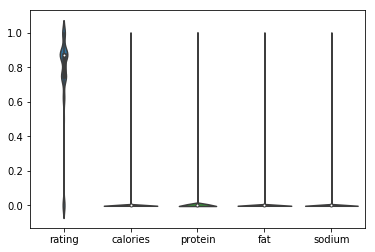

In [9]:
sns.violinplot(data=data_general_info_normalized)

plt.show()

<span style="color:orange">**2. Mark Missing Values.**</span>

In this section, we will look at how we can identify and mark values as missing.  
We can use plots and summary statistics to help identify missing or corrupt data.  
We can load the dataset as a Pandas DataFrame and print summary statistics on each attribute.

In [14]:
print(data.describe())

             rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

Now if we chain a .sum() method on the dataframe, we can see which column contain missing values:

In [15]:
data.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

Let's list all the column names which contain missing values

In [19]:
data.columns[data.isnull().any()].tolist()

['calories', 'protein', 'fat', 'sodium']

The simplest strategy for handling missing data is to remove records that contain a missing value.  
We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.  
Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:  

In [20]:
data.dropna(inplace=True)

Check again to see if we still have missing values:

In [22]:
data.columns[data.isnull().any()].tolist()

[]

<span style="color:red">**YEAH!!!!**</span>

<span style="color:orange">**3. Data Mining.**</span>

Below takes in the predictions as an array and the correct classifications and uses the two to return the confidence interval

In [10]:
# confidenceInterval.py

import numpy as np
from math import sqrt

# TODO: expand evaluator to handle continuous class labels

# class_labels must be discrete and not continuous and numerical

class confidenceInterval:
    CLT_PROB_DIST = {0.1 : 3.09,    # 99.8% confidence
                 0.5 : 2.58,     # 99%     "
                 1.0 : 2.33,    # 98%      "
                 5.0 : 1.65,    # 90%      "
                 10.0 : 1.28,   # 80%      "
                 20.0 : 0.84,   # 60%      "
                 40.0 : 0.25}   # 20%      "
    MAX_SPREAD = 100
    p = None
    q = None
    variance = None
    SN = None
    N = None
    confidence = None
    
    
    def __init__(self, predictions=None, class_labels=None):
        pass

    def quantizeConfidence(self, confidence):
        index = (100 - confidence)/2.0
        values = np.array([0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 40.0])
        diffs = abs(values - index)
        index = values[np.argmin(diffs)]
        return (100 - (2*index)) , index

    
    def establish(self, predictions, class_labels, confidence=90):
        
        assert (len(predictions) == len(class_labels))

        self.confidence, index = self.quantizeConfidence(confidence)
        self.N = len(predictions)

        # ensure that the input arrays are of type numpy.array
        predictions = np.array(predictions)     # predictions.shape = (N,)
        class_labels = np.array(class_labels)   # class_labels.shape = (N,)

        # check to make sure they are the same shape
        assert (predictions.shape == class_labels.shape)

        # compare each array element wise to see if they are the same
        # given multiple class values if they are represented using integers
        # the predictions can be subtracted from the actual class_labels and
        # resulting zeros will indicate a successful predictions; anything else will
        # indicate an error or incorrect prediction

        results = class_labels - predictions
        #print(results)  # prints correctly
        #print(self.N)  # prints 32
        
        self.p = float(len([result for result in results if result == 0]))/float(self.N)
        self.q = 1-self.p
        self.variance = self.p*self.q/self.N
        denom = sqrt(self.variance)

        self.SN = [(self.p - self.CLT_PROB_DIST[index]*denom),
                   (self.p + self.CLT_PROB_DIST[index]*denom)]

        return
        
   
    def printConfidence(self):
        if self.SN != None:
            # \U+03F5 unicode for within the set
            print('Successes: {}\nErrors: {}\n___________\nTotal Instances: {}\n\nP: {}\nQ: {}\nVariance:'
                  ' {}\n'.format(self.p*self.N, self.q*self.N, self.N, self.p, self.q, self.variance))
            print('With {}% confidence probability of correct classification is in the '
                  'range {:.1f}% - {:.1f}%\n\n'.format(self.confidence,self.SN[0]*100,
                                                   self.SN[1]*100))
        else:
            print('Confidence not yet established\n\n')
        return

Below is an implementation of a cross validator.  Will add a more in depth description about this

In [11]:
# crossValidator.py

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
#from confidenceInterval import confidenceInterval

# Linear Classifiers
from sklearn.linear_model import LogisticRegression, LinearRegression

# Decision Tree Classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

CLASS_LABEL = 'rating'
NUM_CLASSES = 6
NUM_SPLITS = 10

df = pd.read_csv('Structured Data/epi_r.csv')  # read in entire dataset
df.fillna(-1, inplace=True)    # replace NaN values with -1

# split data into attributes and class labels
y = df[CLASS_LABEL]
X = df[[col for col in df.columns if col != CLASS_LABEL]]

# convert y to a numpy array
y = np.array(y)
y.reshape((-1,))

# change y from being continuous values between 0-5 to simply being an integer number
# 0, 1, 2, 3, 4, or 5
y = pd.cut(y,NUM_CLASSES, right=False, labels=[i for i in range(NUM_CLASSES)])

# print(y)
# print(X.columns[1])
strat_k_fold = StratifiedKFold(n_splits=NUM_SPLITS)  # parameters n_folds=10, shuffle=False, random_state=None

# Here we want to cast X and y as numpy arrays
X = np.array(X)
y = np.array(y)

# want to find the class that occurs the least often and only take that many instances
# from each class value so that we end up with an even distribution
minimum = np.min([len([val for val in y if val == i]) for i in range(6)])

classes = np.array([],dtype=np.int32).reshape(-1,)
for i in range(NUM_CLASSES):
    classes = np.append(classes,np.array((np.where(y == i)),dtype=np.int32).reshape(-1,)[:minimum])

X = X[classes] # extract our subset from entire dataset
y = y[classes] #              "

X = X[:, 1:]  # remove the title column from the dataset since these are unique to each entry anyway

splits = strat_k_fold.split(X, y)
#scores = np.array([], dtype=np.float32).reshape(-1,)
for train_index, test_index in splits:
    # print('Train Index: {}'.format(train_index))
    # print('Test Index: {}'.format(test_index))
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    # TODO: use a grid search to determine the best learning constant
    #       tweek C and max iterations to get good convergence and speed mix
    log_reg_m = LogisticRegression(solver='lbfgs', C=0.1, max_iter=50000, multi_class='multinomial') #max_iter=50000
    lin_reg_m = LinearRegression()
    dtr_m = DecisionTreeRegressor()
    rfr_m = RandomForestRegressor(n_estimators=100)

    log_reg_m.fit(X_train, y_train)
    lin_reg_m.fit(X_train, y_train)
    dtr_m.fit(X_train, y_train)
    rfr_m.fit(X_train, y_train)


    # print(log_reg_m.score(X_train,y_train))  # validating on test data

    y1 = log_reg_m.predict(X_test) # this one works well not to sure about the others
    y2 = lin_reg_m.predict(X_test)
    y3 = dtr_m.predict(X_test)
    y4 = rfr_m.predict(X_test)

    # try taking an average and choosing the closest
    prediction = (y1 + y2 + y3 + y4) / 4
    prediction = np.around(prediction)
    c1 = confidenceInterval()
    c1.establish(prediction, y_test, 80) # want to know with 80% confidence
    c1.printConfidence()

    # TODO: try voting based on majority
    # prediction = np.column_stack((y1,y2,y3,y4))

#print(scores.sum()/strat_k_fold.n_splits)




Successes: 22.0
Errors: 56.0
___________
Total Instances: 78

P: 0.28205128205128205
Q: 0.717948717948718
Variance: 0.0025961327736475667

With 80.0% confidence probability of correct classification is in the range 21.7% - 34.7%


Successes: 16.0
Errors: 62.00000000000001
___________
Total Instances: 78

P: 0.20512820512820512
Q: 0.7948717948717949
Variance: 0.002090392622937002

With 80.0% confidence probability of correct classification is in the range 14.7% - 26.4%


Successes: 17.0
Errors: 61.0
___________
Total Instances: 78

P: 0.21794871794871795
Q: 0.782051282051282
Variance: 0.0021852189011952326

With 80.0% confidence probability of correct classification is in the range 15.8% - 27.8%


Successes: 18.0
Errors: 59.99999999999999
___________
Total Instances: 78

P: 0.23076923076923078
Q: 0.7692307692307692
Variance: 0.002275830678197542

With 80.0% confidence probability of correct classification is in the range 17.0% - 29.2%


Successes: 24.0
Errors: 48.00000000000001
________